<center>
    <h1>Tema 4: Redes Neuronales</h1>
    <h1>Redes Neuronales 1</h1>
    <br>
    <h5>Prof. Wladimir Rodríguez</h5>
    <h5>wladimir@ula.ve</h5>
    <h5>Departamento de Computación</h5>
</center>

# Redes Neuronales

En este tema vamos a tratar las redes neuronales multicapa, cómo funcionan y cómo entrenarlas para resolver problemas complejos. Sin embargo, antes de profundizar en una arquitectura de red neuronal multicapa particular, reiteremos brevemente algunos de los conceptos de redes neuronales de una sola capa que presentamos anteriormente, el algoritmo ADAptive LInear NEuron (Adaline ), que se muestra en la siguiente figura:

<img src="../figuras/Adaline2.png" width="75%">

### Funciones de Coste

Uno de los ingredientes clave de los algoritmos supervisados de aprendizaje automático es definir una función objetivo que se debe optimizar durante el proceso de aprendizaje. Esta función objetivo es a menudo una función de coste que queremos minimizar. En el caso del Adaline, podemos determinar la función de coste $J$ para aprender los pesos como la Suma de Errores al Cuadrado entre el resultado calculado y la etiqueta de clase verdadera.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$J(w) = \frac{1}{2}\sum_{i}(y^{(i)}-𝜙(z^{(i)}))^2$

La ventaja principal de esta función de activación lineal continua es que la función de coste se vuelve diferenciable. Otra propiedad importante de esta función de coste es que es convexa; Por lo tanto, podemos usar un algoritmo de optimización simple, pero potente, llamado descenso de gradiente para encontrar los pesos que minimizan nuestra función de coste para clasificar las muestras en el conjunto de datos.

### Descenso de Gradiente

Como se ilustra en la siguiente figura, se puede describir el principio detrás del descenso del gradiente como bajar una colina hasta alcanzar un mínimo de coste local o global. En cada iteración, se toma un paso en sentido contrario del gradiente donde el tamaño del paso se determina por el valor de la tasa de aprendizaje, así como la pendiente del gradiente:

<img src="../figuras/gradiente.png" width="75%">

Usando descenso del gradiente, se pueden actualizar los pesos tomando un paso en sentido contrario al gradiente $∇J(w)$  de la función de coste $J(w)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w = w + ∆w$

Donde, el cambio de los pesos $∆w$ es definido como gradiente negativo multiplicado por la tasa de aprendizaje _η_:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$∆w = -η∆J(w)$

Para calcular el gradiente de la función de coste, se necesita calcular la derivada parcial de la función de coste con respecto a cada peso $w_j$,

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\frac{∂J}{∂w_j} = -\sum_{i}(y^{(i)}-𝜙(z^{(i)}))x_{j}^{(i)}$

de esta forma se puede escribir la actualización del peso $w_j$ como:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$∆w_{j} = -η\frac{∂J}{∂w_j} = η\sum_{i}(y^{(i)}-𝜙(z^{(i)}))x_{j}^{(i)}$

Como todos los pesos se actualizan simultaneamente, la regla de aprendizaje del Adaline se convierte en:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$w = w + ∆w$

Aunque la regla de aprendizaje del Adaline se parece a la del Perceptrón, la $𝜙(z^{(i)})$ con $z^{(i)} = w^{T}x^{(i)}$ es un número real y no una etiqueta de clase entera. Además, la actualización de los pesos se calcula tomando en cuenta todos las muestras del conjunto de entrenamiento, en vez de, actualizar los pesos incrementalmente despues de cada muestra. Por lo que a este enfoque se le denomina descenso del gradiente por lotes.

## Redes Neuronales Multicapa

En esta clase, aprenderemos cómo conectar múltiples neuronas individuales a una red neuronal de propagación hacia adelante de múltiples capas; este tipo especial de red totalmente conectada también se llama Perceptrón Multicapa. La siguiente figura ilustra el concepto de un Perceptrón Multicapa que consta de tres capas:


<img src="../figuras/MLP.png" width="75%">

El Perceptrón Multicapa representado en la figura anterior tiene una capa de entrada, una capa oculta y una capa de salida. Las unidades en la capa oculta están completamente conectadas a la capa de entrada, y la capa de salida está completamente conectada a la capa oculta. Si dicha red tiene más de una capa oculta, también la llamamos una red neuronal artificial profunda.

Como se muestra en la figura anterior, denotamos la i-ésima unidad de activación en la capa $l$ como $a_i^{(l)}$. Por ejemplo, $a_i^{(1)}$ se refiere al i-esimo valor de la capa de entrada, $a_i^{(2)}$ se refiere a la iesima unidad de la capa oculta y $a_i^{(3)}$ a la iesima unidad de la capa de salida. Las unidades de activación $a_0^{(1)}$ y $a_0^{(2)}$ son las unidades de sesgo, las cuales se fijan al valor 1. La activación de las unidades en la capa de entrada es su misma entrada más la unidad de sesgo:

$a^{(1)} = \left[\
\begin{array}{ll}
      a_0^{(1)} \\
      a_1^{(1)} \\
      \vdots \\
      a_n^{(1)} \\
\end{array} 
\right]\ $ = $ \left[\
\begin{array}{ll}
      1 \\
      x_1^{(1)} \\
      \vdots \\
      x_n^{(1)} \\
\end{array}
\right]$

Cada unidad de la capa $l$ esta conectada a todas las unidades de la capa $l-1$ por medio de los coeficientes de pesos. Por ejemplo, la connección entre la k-ésima unidad en la capa $l$ y la j-ésima unidad en la capa $l+1$ se denota $w_{k,j}^{(l)}$. Donde la matriz de pesos que conectan la capa de entrada y la capa oculta se denomina $W^{(2)}$ y la que conecta la capa oculta con la capa de salida $W^{(3)}$.

Si bien una unidad en la capa de salida sería suficiente para una tarea de clasificación binaria, en la figura anterior se muestra una forma más general de red neuronal, que nos permite realizar una clasificación multiclase a través de la generalización de la técnica uno contra todos (OvA). Para lo cual utilizaremos la codificación "One-Hot" en el caso de clasificación multiclase. 

### Codficación One-Hot

"One-Hot" se refiere a un estado en ingeniería eléctrica donde todos los bits en un circuito son 0, excepto un único bit con un valor de 1. Se dice que el bit con un valor de 1 es "caliente".

Este sistema de codificación se usa para evitar el problema de que cuando se convieten datos categoricos a una representación numérica, esto implicaría que hay una relación de orden entre las diferentes categorias, lo que podría provocar que el algoritmo de apendizaje no tuviera un buen rendimiento.

Por ejemplo en el caso del conjunto de datos iris, podríamos codificar las tres etiquetas de clases (0=Setosa, 1=Versicolor, 2=Virginica), esto implicaría que Virginica > Versicolor > Setosa.

Usando codificación "One-Hot" para las tres clases de iris, creará tres variables una para cada una de las clases como se muestra a continuación:

$0 = \left[\
\begin{array}{ll}
      1 \\
      0 \\
      0 \\
\end{array} 
\right]\ $, $\ 1 = \left[\
\begin{array}{ll}
      0 \\
      1 \\
      0 \\
\end{array}
\right]\ $, $\ 2 = \left[\
\begin{array}{ll}
      0 \\
      0 \\
      1 \\
\end{array}
\right]$

Esta representación vectorial "One-Hot" nos permite abordar tareas de clasificación con un número arbitrario de etiquetas de clase únicas presentes en el conjunto de entrenamiento.

### Ejemplo de un Perceptrón Multicapa

Resumamos lo que acabamos de aprender en una ilustración descriptiva de un Perceptrón Multicapa 3-4-3 simplificado:

<img src="../figuras/MLP343.png" width="50%">

### Activación de una red neuronal via propagación hacia adelante

El proceso de propagación hacia adelante para calcular la salida de un Perceptron Multicapa se puede resumir en estos tres simples pasos:

1. Comenzando en la capa de entrada, propagamos los patrones de los datos de entrenamiento a través de la red para generar una salida.
2. Basado en la salida de la red, calculamos el error que queremos minimizar usando una función de costo que describiremos más adelante.
3. Propagamos hacia atras el error, encontramos su derivada con respecto a cada peso en la red y actualizamos el modelo.

Finalmente, después de repetir estos tres pasos por múltiples épocas para aprendernos los pesos del Perceptron Multicapa, utilizamos la propagación hacia adelante para calcular la salida de la red y aplicamos una función de umbral para obtener las etiquetas de clase pronosticadas en la representación "one-hot", que describimos anteriormente.

### Propagación hacia adelante

Dado que cada unidad en la capa oculta está conectada a todas las unidades en las capas de entrada, primero calculamos la activación de cada unidad de la capa oculta $a_1^{(2)}$ de la siguiente manera:

$$z_1^{(2)}=a_0^{(1)}w_{0,1}^{(2)}+a_1^{(1)}w_{1,1}^{(2)}+\cdots+a_n^{(1)}w_{1,n}^{(2)}$$

$$a_1^{(2)}=\phi(z_1^{(1)})$$

Donde $z_1^{(2)}$ en la entrada neta y $\phi(\cdot)$ es la función de activación. Un ejemplo de función de activación es la función sigmoide (logistica):

$$\phi(z)=\frac{1}{1+e^{-z}}$$

<img src="../figuras/sigmoide.png" width="50%">

Vectorizando podemos escribir la activación de una manera más compacta:

$$\boldsymbol{z}^{(2)}=\boldsymbol{a}^{(1)}\boldsymbol{W}^{(2)T}$$

$$\boldsymbol{a}^{(2)}=\phi(\boldsymbol{z}^{(2)})$$

Donde $\boldsymbol{a}^{(1)}$ es el vector de dimensiones $1 \times m$ de una muestra $\boldsymbol{x}^{(1)}$ más la unidad de sesgo. $\boldsymbol{W}^{(2)}$ es una matrix de dimensiones $m \times d$ donde $d$ es el número de unidades en la capa oculta.

Posteriormente se calcula la activación de la capa de salida:

$$\boldsymbol{z}^{(3)}=\boldsymbol{a}^{(2)}\boldsymbol{W}^{(3)T}$$

$$\boldsymbol{a}^{(3)}=\phi(\boldsymbol{z}^{(3)})$$

### Implementar un Perceptrón Multicapa

In [88]:
import numpy as np
import sys


class PerceptronMulticapa(object):
    """ Perceptrón Multicapa / Red Neuronal

    Parámetros
    ------------
    n_ocultas : int (default: 30)
        Número de unidades ocultas.
    l2 : float (default: 0.)
        Valor lambda value para la regularización L2.
        Sin regularización si l2=0. (defecto)
    epocas : int (default: 100)
        Número de pasos sobre el conjunto de entrenamiento.
    eta : float (default: 0.001)
        Tasa de aprendizaje.
    barajar : bool (default: True)
        Barajar los datos de entrenamiento cada epoca si True para prevenir ciclos.
    tamaño_mini_lote : int (default: 1)
        NNúmero de mueatras de entrenamiento por mini lote.
    semilla : int (default: None)
        Semilla aleatoria para inicializar los pesos y barajar.

    Atributos
    -----------
    eval_ : dict
      Diccionario para almacenar el costo, exactitud del entrenamiento,
      y exactitud de la validación para cada epoca durante entrenamiento.

    """
    def __init__(self, n_ocultas=30,
                 l2=0., epocas=100, eta=0.001,
                 barajar=True, tamaño_mini_lote=1, semilla=None):

        self.random = np.random.RandomState(semilla)
        self.n_ocultas = n_ocultas
        self.l2 = l2
        self.epocas = epocas
        self.eta = eta
        self.barajar = barajar
        self.tamaño_mini_lote = tamaño_mini_lote

    def _onehot(self, y, n_clases):
        """Codificar etiquetas en representación one-hot

        Parámetros
        ------------
        y : array, shape = [n_muestras]
            Target values.

        Retorna
        -----------
        onehot : array, shape = (n_muestras, n_etiquetas)

        """
        onehot = np.zeros((n_clases, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoide(self, z):
        """Calcular la función logística (sigmoide)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def _hacia_adelante(self, X):
        """Calcular pasos de propagación hacia_adelante"""

        # paso 1: entrada neta a la capa oculta
        # [n_muestras, n_atributos] dot [n_atributos, n_ocultas]
        # -> [n_muestras, n_ocultas]
        z_oculta = np.dot(X, self.w_oculta) + self.b_oculta

        # paso 2: activación de la capa oculta
        a_oculta = self._sigmoide(z_oculta)

        # paso 3: entrada neta a la capa de salida
        # [n_muestras, n_ocultas] dot [n_ocultas, n_etiquetas_clases]
        # -> [n_muestras, n_etiquetas_clases]

        z_salida = np.dot(a_oculta, self.w_salida) + self.b_salida

        # paso 4: activación capa de salida
        a_salida = self._sigmoide(z_salida)

        return z_oculta, a_oculta, z_salida, a_salida

    def _calcular_costo(self, y_enc, salida):
        """Calcular la función de costo.

        Parámetros
        ----------
        y_enc : array, shape = (n_muestras, n_etiquetas)
            etiquetas de clases codificadas one-hot.
        salida : array, shape = [n_muestras, n_unidades_salida]
            Activación de la capa de salida (propagación hacia_adelante)

        Retorna
        ---------
        costo : float
            Costo regularizado

        """
        L2_termino = (self.l2 *
                   (np.sum(self.w_oculta ** 2.) +
                    np.sum(self.w_salida ** 2.)))

        termino1 = -y_enc * (np.log(salida))
        termino2 = (1. - y_enc) * np.log(1. - salida)
        costo = np.sum(termino1 - termino2) + L2_termino
        return costo

    def predict(self, X):
        """Predice etiquetas de clase

        Parámetros
        -----------
        X : array, shape = [n_muestras, n_atributos]
            Capa de entrada con atributos originales.

        Retorna:
        ----------
        y_pred : array, shape = [n_muestras]
            Etiquetas de clase predichas.

        """
        z_oculta, a_oculta, z_salida, a_salida = self._hacia_adelante(X)
        y_pred = np.argmax(z_salida, axis=1)
        return y_pred

    def fit(self, X_entrenamiento, y_entrenamiento, X_validacion, y_validacion):
        """ Aprende pesos a partir de los datos de entrenamiento.

        Parámetros
        -----------
        X_entrenamiento : array, shape = [n_muestras, n_atributos]
            Capa de entrada con atributos originales.
        y_entrenamiento: array, shape = [n_muestras]
            Etiquetas de clase verdaderas.
        X_validacion : array, shape = [n_muestras, n_atributos]
            Muestras de atributos para validación durante entrenamiento
        y_validacion : array, shape = [n_muestras]
            Muestras de etiquetas para validación durante entrenamiento

        Retorna:
        ----------
        self

        """
        n_salida = np.unique(y_entrenamiento).shape[0]  # número de etiquetas de clase
        n_atributos = X_entrenamiento.shape[1]

        #########################
        # Inicialización de Pesos
        #########################

        # pesos para entrada -> oculta
        self.b_oculta = np.zeros(self.n_ocultas)
        self.w_oculta = self.random.normal(loc=0.0, scale=0.1,
                                      size=(n_atributos, self.n_ocultas))

        # pesos para oculta -> salida
        self.b_salida = np.zeros(n_salida)
        self.w_salida = self.random.normal(loc=0.0, scale=0.1,
                                        size=(self.n_ocultas, n_salida))

        epoch_strlen = len(str(self.epocas))  # para formato del progreso
        self.eval_ = {'Costo': [], 'Exactitud_entrenamiento': [], 'Exactitud_validación': []}

        y_entrenamiento_enc = self._onehot(y_entrenamiento, n_salida)

        # iterar sobre las epocas de entrenamiento
        for i in range(self.epocas):

            # iterar sobre los mini lotes
            indices = np.arange(X_entrenamiento.shape[0])

            if self.barajar:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.tamaño_mini_lote +
                                   1, self.tamaño_mini_lote):
                batch_idx = indices[start_idx:start_idx + self.tamaño_mini_lote]

                # propagación hacia_adelante
                z_oculta, a_oculta, z_salida, a_salida = self._hacia_adelante(X_entrenamiento.iloc[batch_idx])

                #########################
                # Propagación hacia atras
                #########################

                # [n_muestras, n_etiquetas_clases]
                sigma_salida = a_salida - y_entrenamiento_enc[batch_idx]

                # [n_muestras, n_ocultas]
                sigmoide_derivada_oculta = a_oculta * (1. - a_oculta)

                # [n_muestras, n_etiquetas_clases] dot [n_etiquetas_clases, n_ocultas]
                # -> [n_muestras, n_ocultas]
                sigma_oculta = (np.dot(sigma_salida, self.w_salida.T) *
                           sigmoide_derivada_oculta)

                # [n_atributos, n_muestras] dot [n_muestras, n_ocultas]
                # -> [n_atributos, n_ocultas]
                grad_w_oculta = np.dot(X_entrenamiento.iloc[batch_idx].T, sigma_oculta)
                grad_b_oculta = np.sum(sigma_oculta, axis=0)

                # [n_ocultas, n_muestras] dot [n_muestras, n_etiquetas_clases]
                # -> [n_ocultas, n_etiquetas_clases]
                grad_w_salida = np.dot(a_oculta.T, sigma_salida)
                grad_b_salida = np.sum(sigma_salida, axis=0)

                # Regularización y actualización de pesos
                delta_w_oculta = (grad_w_oculta + self.l2*self.w_oculta)
                delta_b_oculta = grad_b_oculta # el sesgo no se regulariza
                self.w_oculta -= self.eta * delta_w_oculta
                self.b_oculta -= self.eta * delta_b_oculta

                delta_w_salida = (grad_w_salida + self.l2*self.w_salida)
                delta_b_salida = grad_b_salida  # el sesgo no se regulariza
                self.w_salida -= self.eta * delta_w_salida
                self.b_salida -= self.eta * delta_b_salida

            #############
            # Evaluación
            #############

            # Evaluación después de cada epoca durante entrenamiento
            z_oculta, a_oculta, z_salida, a_salida = self._hacia_adelante(X_entrenamiento)
            
            costo = self._calcular_costo(y_enc=y_entrenamiento_enc,
                                      salida=a_salida)

            y_entrenamiento_pred = self.predict(X_entrenamiento)
            y_validacion_pred = self.predict(X_validacion)

            exactitud_entrenamiento = ((np.sum(y_entrenamiento == y_entrenamiento_pred)).astype(float) /
                         X_entrenamiento.shape[0])
            exactitud_validacion = ((np.sum(y_validacion == y_validacion_pred)).astype(float) /
                         X_validacion.shape[0])

            sys.stderr.write('\r%0*d/%d | Costo: %.2f '
                             '| Exactitud Entrenamiento/Validación: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epocas, costo,
                              exactitud_entrenamiento*100, exactitud_validacion*100))
            sys.stderr.flush()

            self.eval_['Costo'].append(costo)
            self.eval_['Exactitud_entrenamiento'].append(exactitud_entrenamiento)
            self.eval_['Exactitud_validación'].append(exactitud_validacion)

        return self

## Clasificar dígitos escritos a mano

El conjunto de datos MNIST, que es un conjunto de 70 000 imágenes pequeñas de dígitos escritos a mano por estudiantes de secundaria y empleados de la Oficina del Censo de EE. UU. Cada imagen está etiquetada con el dígito que representa. Este conjunto se ha estudiado tanto que a menudo se le llama el "hola mundo" de Machine Learning.

Scikit-Learn proporciona muchas funciones auxiliares para descargar conjuntos de datos populares. MNIST es uno de ellos. El siguiente código obtiene el conjunto de datos MNIST

In [77]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Crear arreglo $X$ con los datos y el arreglo $y$ con las etiquetas

In [78]:
X = mnist['data']
y = mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


Las etiquetas son cadenas por lo que hay que convertirlas a números

In [79]:
y[0]

'5'

In [80]:
y = y.astype(np.uint8)
y[0]

5

El conjunto de datos MNIST en realidad ya está dividido en un conjunto de entrenamiento (las primeras 60 000 imágenes) y un conjunto de prueba (las últimas 10 000 imágenes):

Cargar el conjunto de entrenamiento

In [81]:
X_entrenamiento, y_entrenamiento = X[:60000], y[:60000]
print('Filas: %d, columnas: %d' % (X_entrenamiento.shape[0], X_entrenamiento.shape[1]))

Filas: 60000, columnas: 784


Cargar el conjunto de prueba

In [82]:
X_prueba, y_prueba = X[60000:], y[60000:]
print('Filas: %d, columnas: %d' % (X_prueba.shape[0], X_prueba.shape[1]))

Filas: 10000, columnas: 784


Visualizar el primer dígito de cada clase

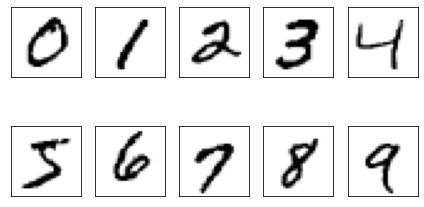

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_entrenamiento[y_entrenamiento == i].iloc[0].values.reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Visualizar 25 versiones diferentes de "9"

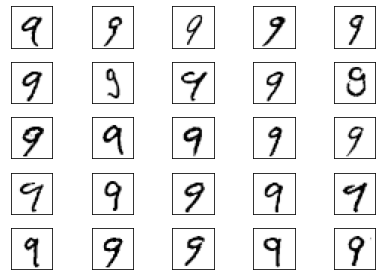

In [84]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_entrenamiento[y_entrenamiento == 9].iloc[i].values.reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_6.png', dpi=300)
plt.show()

#### Entrenar una Red Neuronal con l2=0.0

In [89]:
n_epocas = 200
Red_Neuronal = PerceptronMulticapa(n_ocultas=30, 
                  l2=0.0, 
                  epocas=n_epocas, 
                  eta=0.0005,
                  tamaño_mini_lote=100, 
                  barajar=True,
                  semilla=1)

Red_Neuronal.fit(X_entrenamiento=X_entrenamiento[:55000], 
       y_entrenamiento=y_entrenamiento[:55000],
       X_validacion=X_entrenamiento[55000:],
       y_validacion=y_entrenamiento[55000:])

200/200 | Costo: 26346.32 | Exactitud Entrenamiento/Validación: 92.84%/94.32% 

Gráfico del costo sobre las 200 epocas sin penalización L2

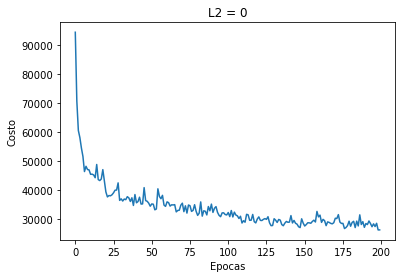

In [90]:
plt.plot(range(Red_Neuronal.epocas), Red_Neuronal.eval_['Costo'])
plt.title('L2 = 0')
plt.ylabel('Costo')
plt.xlabel('Epocas')
plt.show()

Gráfico de la exactitud sobre el conjunto de entrenamiento y el de validación para L2=0

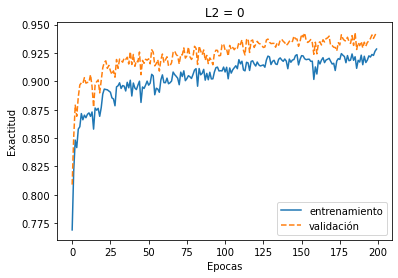

In [62]:
plt.plot(range(Red_Neuronal.epocas), Red_Neuronal.eval_['Exactitud_entrenamiento'], 
         label='entrenamiento')
plt.plot(range(Red_Neuronal.epocas), Red_Neuronal.eval_['Exactitud_validación'], 
         label='validación', linestyle='--')
plt.title('L2 = 0')
plt.ylabel('Exactitud')
plt.xlabel('Epocas')
plt.legend()
plt.show()

In [67]:
y_prueba_pred = Red_Neuronal.predict(X_prueba)
exactitud = (np.sum(y_prueba == y_prueba_pred)
       .astype(float) / X_prueba.shape[0])

print('Exactitud prueba: %.2f%%' % (exactitud * 100))

Exactitud prueba: 92.53%


A pesar del ligero sobreajuste en los datos de entrenamiento, nuestra red neuronal de una capa oculta relativamente simple logró un rendimiento relativamente bueno en el conjunto de datos de prueba, similar a la precisión del conjunto de validación (96.88 por ciento).

#### Entrenar una Red Neuronal con l2=0.01

In [68]:
n_epocas = 200
Red_Neuronal2 = PerceptronMulticapa(n_ocultas=30, 
                  l2=0.01, 
                  epocas=n_epocas, 
                  eta=0.0005,
                  tamaño_mini_lote=100, 
                  barajar=True,
                  semilla=1)

Red_Neuronal2.fit(X_entrenamiento=X_entrenamiento[:55000], 
       y_entrenamiento=y_entrenamiento[:55000],
       X_validacion=X_entrenamiento[55000:],
       y_validacion=y_entrenamiento[55000:])

200/200 | Costo: 29860.04 | Exactitud Entrenamiento/Validación: 91.73%/93.42% 

Gráfico del costo sobre las 200 epocas con penalización L2=0.01

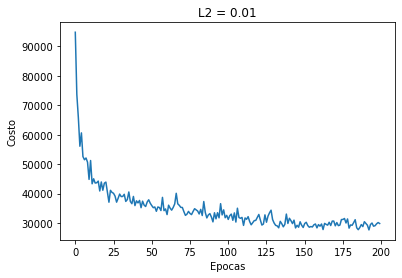

In [69]:
plt.plot(range(Red_Neuronal2.epocas), Red_Neuronal2.eval_['Costo'])
plt.title('L2 = 0.01')
plt.ylabel('Costo')
plt.xlabel('Epocas')
plt.show()

Gráfico de la exactitud sobre el conjunto de entrenamiento y el de validación para L2=0.01

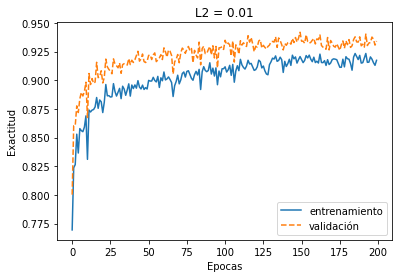

In [70]:
plt.plot(range(Red_Neuronal2.epocas), Red_Neuronal2.eval_['Exactitud_entrenamiento'], 
         label='entrenamiento')
plt.plot(range(Red_Neuronal2.epocas), Red_Neuronal2.eval_['Exactitud_validación'], 
         label='validación', linestyle='--')
plt.title('L2 = 0.01')
plt.ylabel('Exactitud')
plt.xlabel('Epocas')
plt.legend()
plt.show()

In [72]:
y_prueba_pred = Red_Neuronal2.predict(X_prueba)
exactitud = (np.sum(y_prueba == y_prueba_pred)
       .astype(float) / X_prueba.shape[0])

print('Exactitud prueba: %.2f%%' % (exactitud * 100))

Exactitud prueba: 92.22%


#### Entrenar una Red Neuronal con l2=0.1

In [73]:
n_epocas = 200
Red_Neuronal3 = PerceptronMulticapa(n_ocultas=30, 
                  l2=0.1, 
                  epocas=n_epocas, 
                  eta=0.0005,
                  tamaño_mini_lote=100, 
                  barajar=True,
                  semilla=1)

Red_Neuronal3.fit(X_entrenamiento=X_entrenamiento[:55000], 
       y_entrenamiento=y_entrenamiento[:55000],
       X_validacion=X_entrenamiento[55000:],
       y_validacion=y_entrenamiento[55000:])

200/200 | Costo: 32444.67 | Exactitud Entrenamiento/Validación: 91.15%/93.22%  

Gráfico del costo sobre las 200 epocas con penalización $L2=0.1$

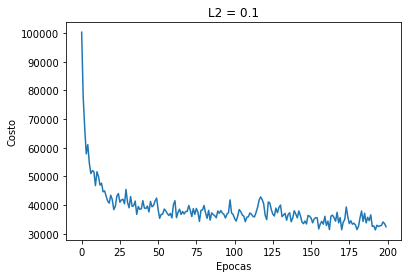

In [74]:
plt.plot(range(Red_Neuronal3.epocas), Red_Neuronal3.eval_['Costo'])
plt.title('L2 = 0.1')
plt.ylabel('Costo')
plt.xlabel('Epocas')
plt.show()

Gráfico de la exactitud sobre el conjunto de entrenamiento y el de validación para $L2=0.1$

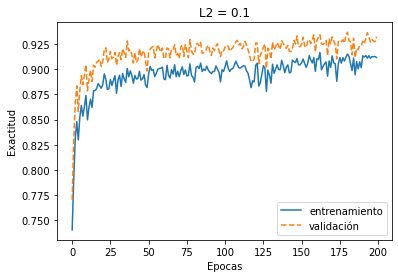

In [75]:
plt.plot(range(Red_Neuronal3.epocas), Red_Neuronal3.eval_['Exactitud_entrenamiento'], 
         label='entrenamiento')
plt.plot(range(Red_Neuronal3.epocas), Red_Neuronal3.eval_['Exactitud_validación'], 
         label='validación', linestyle='--')
plt.title('L2 = 0.1')
plt.ylabel('Exactitud')
plt.xlabel('Epocas')
plt.legend()
plt.show()

In [27]:
y_prueba_pred = Red_Neuronal3.predict(X_prueba)
exactitud = (np.sum(y_prueba == y_prueba_pred)
       .astype(np.float) / X_prueba.shape[0])

print('Exactitud prueba: %.2f%%' % (exactitud * 100))

Exactitud prueba: 95.04%
